In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv(r"C:\Users\naruk\OneDrive\Desktop\diamonds.csv")
dataset.cut[dataset.cut=="Fair"]=1
dataset.cut[dataset.cut=="Good"]=2
dataset.cut[dataset.cut=="Very Good"]=3
dataset.cut[dataset.cut=="Premium"]=4
dataset.cut[dataset.cut=="Ideal"]=5
dataset.clarity[dataset.clarity=="SI2"]=1
dataset.clarity[dataset.clarity=="SI1"]=2
dataset.clarity[dataset.clarity=="VS1"]=3
dataset.clarity[dataset.clarity=="VS2"]=4
dataset.clarity[dataset.clarity=="VVS2"]=5
dataset.clarity[dataset.clarity=="VVS1"]=6
dataset.clarity[dataset.clarity=="I1"]=7
dataset.clarity[dataset.clarity=="IF"]=8
origin = dataset.pop('carat')
o=dataset.pop('clarity')
dataset['fair'] = (origin == 1)*1.0
dataset['good'] = (origin == 2)*1.0
dataset['very good'] = (origin == 3)*1.0
dataset['premium'] = (origin == 4)*1.0
dataset['ideal'] = (origin == 5)*1.0
dataset['s1'] = (o == 1)*1.0
dataset['s2'] = (o == 2)*1.0
dataset['vs1'] = (o == 3)*1.0
dataset['vs2'] = (o == 4)*1.0
dataset['vvs2'] = (o == 5)*1.0
dataset['vvs1'] = (o== 6)*1.0
dataset['i1'] = (o == 7)*1.0
dataset['i2'] = (o == 8)*1.0


C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naruk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [8]:
data=dataset.drop("color",axis=1)
data=data.iloc[:,1:22]
y=data.price
x=data.drop("price",axis=1)
x

,cut,depth,table,x,y,z,fair,good,very good,premium,ideal,s1,s2,vs1,vs2,vvs2,vvs1,i1,i2
0,5,61.5,55.0,3.95,3.98,2.43,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,56.9,65.0,4.05,4.07,2.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,63.3,58.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,5,60.8,57.0,5.75,5.76,3.50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53936,2,63.1,55.0,5.69,5.75,3.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53937,3,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53938,4,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
import sklearn
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=5)

In [10]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=model.predict(x_test)
mse=sklearn.metrics.mean_squared_error(y_pred,y_test)
print(mse)

2.7761139101453607e+27


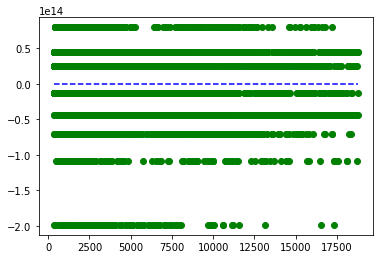

In [13]:
plt.plot(y_test,y_pred,"go",[y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"b--")

In [22]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [27]:
model=BaggingRegressor()

In [21]:
model.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [23]:
model.score(x_test,y_test)

0.9290962226063164

In [24]:
y_pred=model.predict(x_test)
x_test.shape

(10788, 19)

In [25]:
print(sklearn.metrics.mean_squared_error(y_pred,y_test))

1115782.8235245792


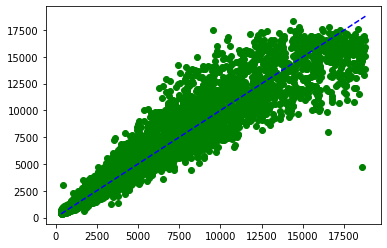

In [26]:
plt.plot(y_test,y_pred,"go",[y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"b--")